## - 불러올 패키지 목록

In [1]:
# 수학 함수 패키지
import math

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.formula.api import *
from statsmodels.multivariate.pca import PCA as pca  # 대문자로 사용할 경우 sklearn 의 PCA와 겹침
from statsmodels.tools.eval_measures import rmse  # rmse 계산


# SciPy 패키지
import scipy as sp
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# pingouin 패키지
import pingouin as pg

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  # 변수선택 알고리즘 포함
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

## Boston 주택 가격 dataset 사용

* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

In [2]:
df_house = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\rawdata\housing.csv')

df_house

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df_house.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [4]:
df_house = df_house[['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
df_house

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [5]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MEDV     506 non-null    float64
 1   CRIM     506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   CHAS     506 non-null    int64  
 5   NOX      506 non-null    float64
 6   RM       506 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        506 non-null    float64
 13  LSTAT    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df_house.describe().T

,count,mean,std,min,25%,50%,75%,max
MEDV,506.0,22.532806,9.197104,5.00000,17.025000,21.20000,25.000000,50.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000


In [7]:
df_scaled = StandardScaler().fit_transform(df_house.iloc[:,:])

df_scaled

array([[ 0.15968566, -0.41978194,  0.28482986, ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.10152429, -0.41733926, -0.48772236, ..., -0.30309415,
         0.44105193, -0.49243937],
       [ 1.32424667, -0.41734159, -0.48772236, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [ 0.14880191, -0.41344658, -0.48772236, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.0579893 , -0.40776407, -0.48772236, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-1.15724782, -0.41500016, -0.48772236, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [8]:
for i in list(range(0,14,1)):
    df_house.iloc[:,i] = df_scaled[:, i]

df_house

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.159686,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.101524,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,1.324247,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,1.182758,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,1.487503,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.014454,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.210362,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,0.148802,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.057989,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


# 일반 선형 회귀분석

In [9]:
x = df_house.iloc[:, 1:14]
x = add_constant(x)

y = df_house.iloc[:, 0]

model = OLS( y, x )

fit_model = model.fit()

print( fit_model.summary() )

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 02 Sep 2021   Prob (F-statistic):          6.72e-135
Time:                        01:32:48   Log-Likelihood:                -376.55
No. Observations:                 506   AIC:                             781.1
Df Residuals:                     492   BIC:                             840.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.909e-16      0.023  -2.14e-14      1.0

### 다중공선성 확인

In [10]:
# VIF 확인
VIF = pd.DataFrame()

VIF['features'] = x.columns
VIF['VIF factor'] = [ variance_inflation_factor(x.values, i) for i in range(x.shape[1]) ]

VIF.round(3)

,features,VIF factor
0,const,1.000
1,CRIM,1.792
2,ZN,2.299
3,INDUS,3.992
4,CHAS,1.074
5,NOX,4.394
6,RM,1.934
7,AGE,3.101
8,DIS,3.956
9,RAD,7.484


## 변수 선택

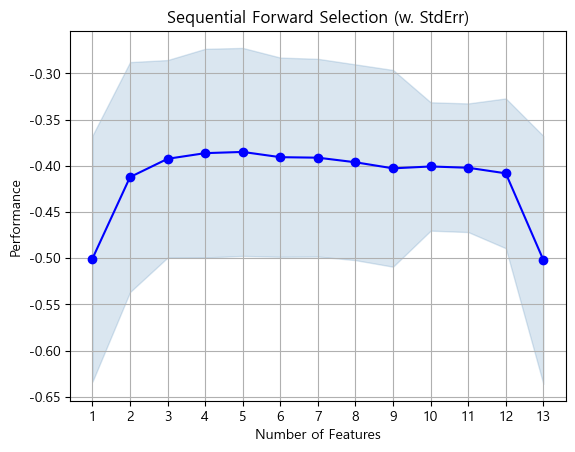

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(12,)","[-0.2593172109263487, -0.7192359683128805, -0....",-0.500406,"(LSTAT,)",0.369452,0.230478,0.133067
2,"(10, 12)","[-0.19858682129522623, -0.6109640869462714, -0...",-0.412232,"(PTRATIO, LSTAT)",0.34519,0.215343,0.124328
3,"(5, 10, 12)","[-0.11116282435461099, -0.4315386443726804, -0...",-0.39246,"(RM, PTRATIO, LSTAT)",0.296492,0.184963,0.106788
4,"(5, 10, 11, 12)","[-0.11101596351675704, -0.4093366471924741, -0...",-0.386339,"(RM, PTRATIO, B, LSTAT)",0.313236,0.195408,0.112819
5,"(1, 5, 10, 11, 12)","[-0.11304898991291892, -0.4084618210812901, -0...",-0.385025,"(ZN, RM, PTRATIO, B, LSTAT)",0.312291,0.194819,0.112479
6,"(4, 5, 7, 10, 11, 12)","[-0.16005993977726474, -0.37856625854123804, -...",-0.390701,"(NOX, RM, DIS, PTRATIO, B, LSTAT)",0.299034,0.186549,0.107704
7,"(2, 4, 5, 7, 10, 11, 12)","[-0.16296374163158955, -0.3779942686463043, -0...",-0.391245,"(INDUS, NOX, RM, DIS, PTRATIO, B, LSTAT)",0.296793,0.185151,0.106897
8,"(1, 2, 4, 5, 7, 10, 11, 12)","[-0.16097965758374733, -0.3816805880534365, -0...",-0.396218,"(ZN, INDUS, NOX, RM, DIS, PTRATIO, B, LSTAT)",0.293909,0.183351,0.105858
9,"(1, 2, 3, 4, 5, 7, 10, 11, 12)","[-0.15313148926330442, -0.4619550512485755, -0...",-0.402775,"(ZN, INDUS, CHAS, NOX, RM, DIS, PTRATIO, B, LS...",0.295322,0.184233,0.106367
10,"(0, 1, 4, 6, 7, 8, 9, 10, 11, 12)","[-0.20639675333696092, -0.4883161857836073, -0...",-0.400756,"(CRIM, ZN, NOX, AGE, DIS, RAD, TAX, PTRATIO, B...",0.1927,0.120213,0.069405


In [11]:
x = df_house.iloc[:, 1:14]
y = df_house.iloc[:, 0]

lr = LinearRegression()

sffs = SFS( lr, k_features=13,
            forward=True, floating=True,
            scoring='neg_mean_squared_error',
            cv=4, n_jobs=-1)

sffs.fit(x,y)

fig = plot_sfs(sffs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

pd.DataFrame.from_dict(sffs.get_metric_dict()).T

## 선택된 변수들로 회귀분석

In [12]:
x = df_house[['RM', 'PTRATIO', 'B', 'LSTAT']]
x = add_constant(x)

y = df_house.iloc[:, 0]

model = OLS( y, x )

fit_model = model.fit()

print( fit_model.summary() )

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     275.9
Date:                Thu, 02 Sep 2021   Prob (F-statistic):          4.10e-125
Time:                        01:32:57   Log-Likelihood:                -423.51
No. Observations:                 506   AIC:                             857.0
Df Residuals:                     501   BIC:                             878.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.909e-16      0.025  -1.97e-14      1.0

### 다중공선성 확인

In [13]:
# VIF 확인
VIF = pd.DataFrame()

VIF['features'] = x.columns
VIF['VIF factor'] = [ variance_inflation_factor(x.values, i) for i in range(x.shape[1]) ]

VIF.round(3)

,features,VIF factor
0,const,1.000
1,RM,1.687
2,PTRATIO,1.204
3,B,1.181
4,LSTAT,1.912


# Ridge 회귀

- `sklearn.linear_model.Ridge( alpha=1.0, *, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None )`  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [14]:
x = df_house.iloc[:, 1:14]
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = Ridge(alpha = 10)
fit_model = model.fit(x,y)

In [15]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()

# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

     features         coeff
0   intercept -6.865615e-16
1        CRIM -9.349692e-02
2          ZN  1.039370e-01
3       INDUS -4.497878e-03
4        CHAS  7.703296e-02
5         NOX -1.972800e-01
6          RM  2.984698e-01
7         AGE -3.524460e-03
8         DIS -3.109221e-01
9         RAD  2.283218e-01
10        TAX -1.703736e-01
11    PTRATIO -2.163418e-01
12          B  9.193600e-02
13      LSTAT -3.944207e-01

 5 folds 의 개별 Negative MSE scores:  [-0.134 -0.286 -0.385 -0.929 -0.339]
 5 folds 의 개별 RMSE scores :  [0.366 0.534 0.621 0.964 0.582]
 5 folds 의 평균 RMSE : 0.613 



In [16]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

R-squared : 0.7398
Adj. R-squared : 0.7329

F-statistic : 107.5933
p-value (of F-stat.) 0.0

      Feature  Coefficients  Standard Errors  t-statistic  Probabilities
0   Intercept       -0.0000            0.023       -0.000          1.000
1        CRIM       -0.0935            0.031       -3.037          0.003
2          ZN        0.1039            0.035        2.981          0.003
3       INDUS       -0.0045            0.046       -0.098          0.922
4        CHAS        0.0770            0.024        3.232          0.001
5         NOX       -0.1973            0.048       -4.092          0.000
6          RM        0.2985            0.032        9.333          0.000
7         AGE       -0.0035            0.040       -0.087          0.931
8         DIS       -0.3109            0.046       -6.797          0.000
9         RAD        0.2283            0.063        3.629          0.000
10        TAX       -0.1704            0.069       -2.468          0.014
11    PTRATIO       -0.2163    

## RMSE 가 최소인 조건 탐색

alpha 0 일 때 5 folds 의 평균 RMSE : 0.634 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 0.634 
alpha 1 일 때 5 folds 의 평균 RMSE : 0.632 
alpha 10 일 때 5 folds 의 평균 RMSE : 0.613 
alpha 50 일 때 5 folds 의 평균 RMSE : 0.590 
alpha 100 일 때 5 folds 의 평균 RMSE : 0.590 
alpha 150 일 때 5 folds 의 평균 RMSE : 0.598 
alpha 200 일 때 5 folds 의 평균 RMSE : 0.607 
alpha 500 일 때 5 folds 의 평균 RMSE : 0.665 


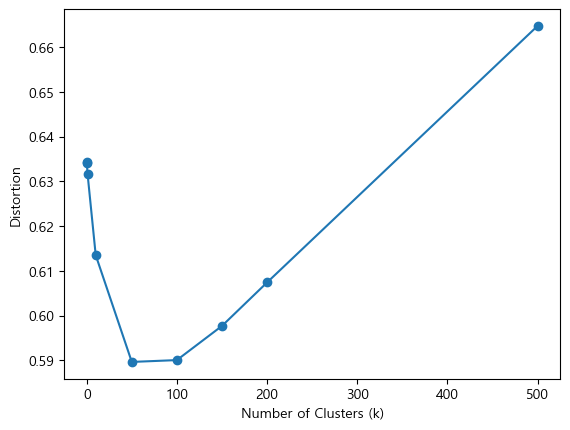

In [17]:
# 조건 탐색에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 50, 100, 150, 200, 500]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
rmse_result = list()

for alpha in alphas :
    model = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    rmse_result.append(avg_rmse)
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))
    
# alpha 에 따른 rmse의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot( alphas, rmse_result, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

alpha 50 일 때 5 folds 의 평균 RMSE : 0.58964 
alpha 55 일 때 5 folds 의 평균 RMSE : 0.58897 
alpha 60 일 때 5 folds 의 평균 RMSE : 0.58853 
alpha 65 일 때 5 folds 의 평균 RMSE : 0.58828 
alpha 70 일 때 5 folds 의 평균 RMSE : 0.58820 
alpha 75 일 때 5 folds 의 평균 RMSE : 0.58825 
alpha 80 일 때 5 folds 의 평균 RMSE : 0.58843 
alpha 85 일 때 5 folds 의 평균 RMSE : 0.58871 
alpha 90 일 때 5 folds 의 평균 RMSE : 0.58908 
alpha 95 일 때 5 folds 의 평균 RMSE : 0.58953 


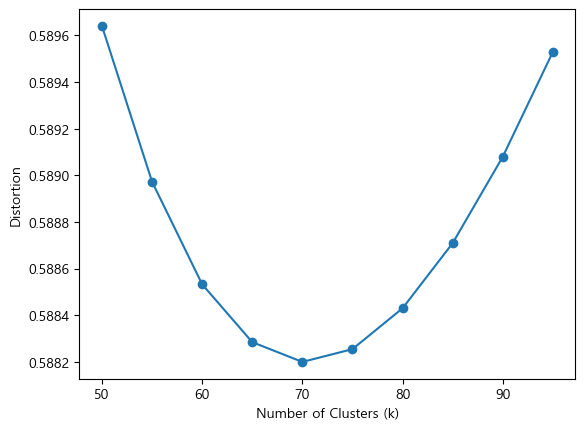

In [18]:
# 조건 탐색에 사용될 alpha 파라미터의 값들을 정의
alphas = list(range(50, 100, 5))

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
rmse_result = list()

for alpha in alphas :
    model = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    rmse_result.append(avg_rmse)
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.5f} '.format(alpha,avg_rmse))
    
# alpha 에 따른 rmse의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot( alphas, rmse_result, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

## 최소 RMSE 조건으로 회귀분석 수행

In [19]:
x = df_house.iloc[:, 1:14]
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = Ridge(alpha = 70)
fit_model = model.fit(x,y)

In [20]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()


# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

     features         coeff
0   intercept -6.416026e-16
1        CRIM -7.488325e-02
2          ZN  6.982217e-02
3       INDUS -3.890317e-02
4        CHAS  8.085430e-02
5         NOX -1.187351e-01
6          RM  3.064454e-01
7         AGE -1.633539e-02
8         DIS -2.123544e-01
9         RAD  1.003124e-01
10        TAX -7.758274e-02
11    PTRATIO -1.892930e-01
12          B  8.735700e-02
13      LSTAT -3.411394e-01

 5 folds 의 개별 Negative MSE scores:  [-0.114 -0.279 -0.411 -0.837 -0.27 ]
 5 folds 의 개별 RMSE scores :  [0.337 0.529 0.641 0.915 0.519]
 5 folds 의 평균 RMSE : 0.588 



In [21]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

R-squared : 0.7272
Adj. R-squared : 0.72

F-statistic : 100.9004
p-value (of F-stat.) 0.0

      Feature  Coefficients  Standard Errors  t-statistic  Probabilities
0   Intercept       -0.0000            0.024       -0.000          1.000
1        CRIM       -0.0749            0.032       -2.376          0.018
2          ZN        0.0698            0.036        1.956          0.051
3       INDUS       -0.0389            0.047       -0.827          0.409
4        CHAS        0.0809            0.024        3.313          0.001
5         NOX       -0.1187            0.049       -2.406          0.017
6          RM        0.3064            0.033        9.359          0.000
7         AGE       -0.0163            0.041       -0.394          0.694
8         DIS       -0.2124            0.047       -4.534          0.000
9         RAD        0.1003            0.064        1.557          0.120
10        TAX       -0.0776            0.071       -1.098          0.273
11    PTRATIO       -0.1893      

## t-통계량의 p값을 참고하여 유의하지 않은 변수 삭제하여 재진행

In [22]:
x = df_house.iloc[:, 1:14].drop(['ZN', 'INDUS', 'AGE', 'RAD', 'TAX'], axis =1)
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = Ridge(alpha = 70)
fit_model = model.fit(x,y)

In [23]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()


# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

    features         coeff
0  intercept -6.609296e-16
1       CRIM -5.606091e-02
2       CHAS  8.050251e-02
3        NOX -1.404382e-01
4         RM  3.229740e-01
5        DIS -1.617791e-01
6    PTRATIO -2.034925e-01
7          B  8.398608e-02
8      LSTAT -3.514721e-01

 5 folds 의 개별 Negative MSE scores:  [-0.119 -0.283 -0.432 -0.8   -0.244]
 5 folds 의 개별 RMSE scores :  [0.345 0.532 0.658 0.895 0.494]
 5 folds 의 평균 RMSE : 0.585 



In [24]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

R-squared : 0.7165
Adj. R-squared : 0.712

F-statistic : 157.0489
p-value (of F-stat.) 0.0

     Feature  Coefficients  Standard Errors  t-statistic  Probabilities
0  Intercept       -0.0000            0.024       -0.000          1.000
1       CRIM       -0.0561            0.029       -1.956          0.051
2       CHAS        0.0805            0.024        3.287          0.001
3        NOX       -0.1404            0.042       -3.376          0.001
4         RM        0.3230            0.031       10.262          0.000
5        DIS       -0.1618            0.038       -4.225          0.000
6    PTRATIO       -0.2035            0.027       -7.561          0.000
7          B        0.0840            0.027        3.082          0.002
8      LSTAT       -0.3515            0.038       -9.167          0.000



### 다중공선성 확인

In [25]:
# VIF 확인
VIF = pd.DataFrame()

VIF['features'] = newX.columns
VIF['VIF factor'] = [ variance_inflation_factor(newX.values, i) for i in range(newX.shape[1]) ]

VIF.round(3)

,features,VIF factor
0,Intercept,1.000
1,CRIM,1.440
2,CHAS,1.052
3,NOX,3.034
4,RM,1.737
5,DIS,2.571
6,PTRATIO,1.270
7,B,1.302
8,LSTAT,2.577


# Lasso 회귀

- `sklearn.linear_model.Lasso( alpha=1.0, *, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic' )`  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [26]:
x = df_house.iloc[:, 1:14]
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = Lasso(alpha = 10)
fit_model = model.fit(x,y)

In [27]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()

# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

     features         coeff
0   intercept -5.195668e-16
1        CRIM -0.000000e+00
2          ZN  0.000000e+00
3       INDUS -0.000000e+00
4        CHAS  0.000000e+00
5         NOX -0.000000e+00
6          RM  0.000000e+00
7         AGE -0.000000e+00
8         DIS  0.000000e+00
9         RAD -0.000000e+00
10        TAX -0.000000e+00
11    PTRATIO -0.000000e+00
12          B  0.000000e+00
13      LSTAT -0.000000e+00

 5 folds 의 개별 Negative MSE scores:  [-0.409 -1.144 -1.9   -1.154 -1.08 ]
 5 folds 의 개별 RMSE scores :  [0.64  1.07  1.378 1.074 1.039]
 5 folds 의 평균 RMSE : 1.040 



In [28]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

R-squared : 0.0
Adj. R-squared : -0.0264

F-statistic : 0.0
p-value (of F-stat.) 1.0

      Feature  Coefficients  Standard Errors  t-statistic  Probabilities
0   Intercept          -0.0            0.045         -0.0            1.0
1        CRIM          -0.0            0.060         -0.0            1.0
2          ZN           0.0            0.068          0.0            1.0
3       INDUS          -0.0            0.090         -0.0            1.0
4        CHAS           0.0            0.047          0.0            1.0
5         NOX          -0.0            0.095         -0.0            1.0
6          RM           0.0            0.063          0.0            1.0
7         AGE          -0.0            0.079         -0.0            1.0
8         DIS           0.0            0.090          0.0            1.0
9         RAD          -0.0            0.123         -0.0            1.0
10        TAX          -0.0            0.135         -0.0            1.0
11    PTRATIO          -0.0           

## RMSE 가 최소인 조건 탐색

alpha 0.0 일 때 5 folds 의 평균 RMSE : 0.63438 
alpha 0.01 일 때 5 folds 의 평균 RMSE : 0.61629 
alpha 0.02 일 때 5 folds 의 평균 RMSE : 0.61483 
alpha 0.03 일 때 5 folds 의 평균 RMSE : 0.62075 
alpha 0.04 일 때 5 folds 의 평균 RMSE : 0.62946 
alpha 0.05 일 때 5 folds 의 평균 RMSE : 0.63447 
alpha 0.06 일 때 5 folds 의 평균 RMSE : 0.63750 
alpha 0.07 일 때 5 folds 의 평균 RMSE : 0.64132 
alpha 0.08 일 때 5 folds 의 평균 RMSE : 0.64611 
alpha 0.09 일 때 5 folds 의 평균 RMSE : 0.65101 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 0.65647 
alpha 0.11 일 때 5 folds 의 평균 RMSE : 0.66221 
alpha 0.12 일 때 5 folds 의 평균 RMSE : 0.66786 
alpha 0.13 일 때 5 folds 의 평균 RMSE : 0.67360 
alpha 0.14 일 때 5 folds 의 평균 RMSE : 0.67928 
alpha 0.15 일 때 5 folds 의 평균 RMSE : 0.68526 
alpha 0.16 일 때 5 folds 의 평균 RMSE : 0.69158 
alpha 0.17 일 때 5 folds 의 평균 RMSE : 0.69812 
alpha 0.18 일 때 5 folds 의 평균 RMSE : 0.70493 
alpha 0.19 일 때 5 folds 의 평균 RMSE : 0.71199 


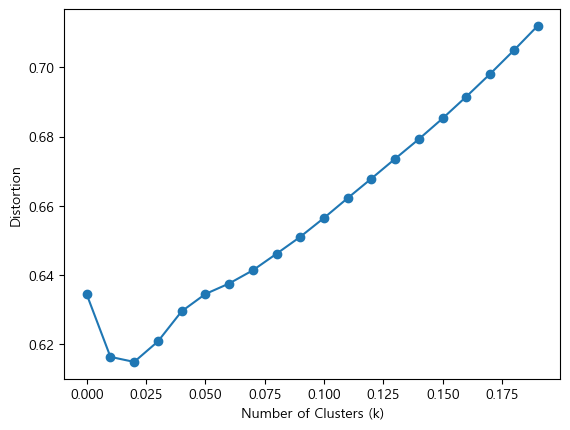

In [29]:
# 조건 탐색에 사용될 alpha 파라미터의 값들을 정의
alphas = np.arange(0, 0.2, 0.01)

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
rmse_result = list()

for alpha in alphas :
    model = Lasso(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    rmse_result.append(avg_rmse)
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.5f} '.format(alpha,avg_rmse))
    
# alpha 에 따른 rmse의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot( alphas, rmse_result, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

alpha 0.01 일 때 5 folds 의 평균 RMSE : 0.61629 
alpha 0.011 일 때 5 folds 의 평균 RMSE : 0.61571 
alpha 0.011999999999999999 일 때 5 folds 의 평균 RMSE : 0.61518 
alpha 0.012999999999999998 일 때 5 folds 의 평균 RMSE : 0.61457 
alpha 0.013999999999999997 일 때 5 folds 의 평균 RMSE : 0.61422 
alpha 0.014999999999999996 일 때 5 folds 의 평균 RMSE : 0.61407 
alpha 0.015999999999999993 일 때 5 folds 의 평균 RMSE : 0.61385 
alpha 0.016999999999999994 일 때 5 folds 의 평균 RMSE : 0.61381 
alpha 0.017999999999999995 일 때 5 folds 의 평균 RMSE : 0.61396 
alpha 0.018999999999999993 일 때 5 folds 의 평균 RMSE : 0.61431 
alpha 0.01999999999999999 일 때 5 folds 의 평균 RMSE : 0.61483 
alpha 0.02099999999999999 일 때 5 folds 의 평균 RMSE : 0.61531 
alpha 0.021999999999999992 일 때 5 folds 의 평균 RMSE : 0.61595 
alpha 0.02299999999999999 일 때 5 folds 의 평균 RMSE : 0.61667 
alpha 0.023999999999999987 일 때 5 folds 의 평균 RMSE : 0.61698 
alpha 0.024999999999999988 일 때 5 folds 의 평균 RMSE : 0.61735 
alpha 0.02599999999999999 일 때 5 folds 의 평균 RMSE : 0.61780 
alpha 0.0269999

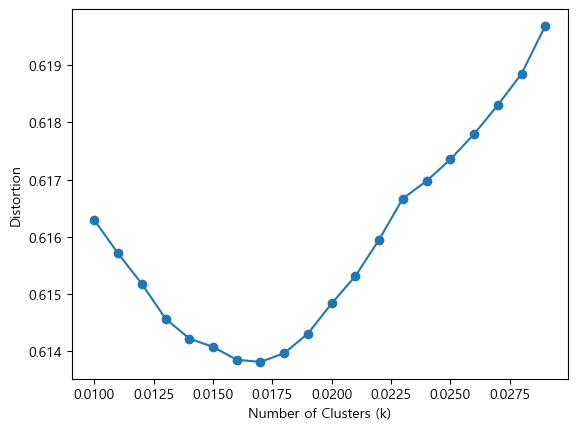

In [30]:
# 조건 탐색에 사용될 alpha 파라미터의 값들을 정의
alphas = np.arange(0.01, 0.03, 0.001)

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
rmse_result = list()

for alpha in alphas :
    model = Lasso(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    rmse_result.append(avg_rmse)
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.5f} '.format(alpha,avg_rmse))
    
# alpha 에 따른 rmse의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot( alphas, rmse_result, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

## 최소 RMSE 조건으로 회귀분석 수행

In [31]:
x = df_house.iloc[:, 1:14]
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = Lasso(alpha = 0.017)
fit_model = model.fit(x,y)

In [32]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()

# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

     features         coeff
0   intercept -6.849950e-16
1        CRIM -5.076965e-02
2          ZN  5.442042e-02
3       INDUS -7.998799e-03
4        CHAS  7.002851e-02
5         NOX -1.425079e-01
6          RM  3.167562e-01
7         AGE -0.000000e+00
8         DIS -2.213966e-01
9         RAD  4.108813e-02
10        TAX -1.745399e-02
11    PTRATIO -2.009728e-01
12          B  7.759395e-02
13      LSTAT -4.048552e-01

 5 folds 의 개별 Negative MSE scores:  [-0.125 -0.276 -0.402 -0.973 -0.324]
 5 folds 의 개별 RMSE scores :  [0.354 0.525 0.634 0.986 0.569]
 5 folds 의 평균 RMSE : 0.614 



In [33]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

R-squared : 0.7277
Adj. R-squared : 0.7205

F-statistic : 101.1196
p-value (of F-stat.) 0.0

      Feature  Coefficients  Standard Errors  t-statistic  Probabilities
0   Intercept       -0.0000            0.024       -0.000          1.000
1        CRIM       -0.0508            0.031       -1.612          0.108
2          ZN        0.0544            0.036        1.526          0.128
3       INDUS       -0.0080            0.047       -0.170          0.865
4        CHAS        0.0700            0.024        2.872          0.004
5         NOX       -0.1425            0.049       -2.890          0.004
6          RM        0.3168            0.033        9.682          0.000
7         AGE       -0.0000            0.041       -0.000          1.000
8         DIS       -0.2214            0.047       -4.731          0.000
9         RAD        0.0411            0.064        0.638          0.524
10        TAX       -0.0175            0.071       -0.247          0.805
11    PTRATIO       -0.2010    

## t-통계량의 p값을 참고하여 유의하지 않은 변수 삭제하여 재진행

In [34]:
x = df_house.iloc[:, 1:14].drop(['CRIM', 'ZN', 'INDUS', 'AGE', 'RAD', 'TAX'], axis =1)
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = Lasso(alpha = 0.017)
fit_model = model.fit(x,y)

In [35]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()

# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

    features         coeff
0  intercept -6.815406e-16
1       CHAS  7.149675e-02
2        NOX -1.421189e-01
3         RM  3.265281e-01
4        DIS -1.805873e-01
5    PTRATIO -2.122543e-01
6          B  8.087355e-02
7      LSTAT -4.131581e-01

 5 folds 의 개별 Negative MSE scores:  [-0.127 -0.285 -0.407 -0.91  -0.302]
 5 folds 의 개별 RMSE scores :  [0.356 0.534 0.638 0.954 0.549]
 5 folds 의 평균 RMSE : 0.606 



In [36]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

R-squared : 0.719
Adj. R-squared : 0.715

F-statistic : 182.0028
p-value (of F-stat.) 0.0

     Feature  Coefficients  Standard Errors  t-statistic  Probabilities
0  Intercept       -0.0000            0.024       -0.000          1.000
1       CHAS        0.0715            0.024        2.939          0.003
2        NOX       -0.1421            0.041       -3.449          0.001
3         RM        0.3265            0.031       10.452          0.000
4        DIS       -0.1806            0.038       -4.750          0.000
5    PTRATIO       -0.2123            0.026       -8.012          0.000
6          B        0.0809            0.026        3.053          0.002
7      LSTAT       -0.4132            0.037      -11.035          0.000



### 다중공선성 확인

In [37]:
# VIF 확인
VIF = pd.DataFrame()

VIF['features'] = newX.columns
VIF['VIF factor'] = [ variance_inflation_factor(newX.values, i) for i in range(newX.shape[1]) ]

VIF.round(3)

,features,VIF factor
0,Intercept,1.000
1,CHAS,1.049
2,NOX,3.009
3,RM,1.730
4,DIS,2.562
5,PTRATIO,1.244
6,B,1.243
7,LSTAT,2.484


# Elastic Net 회귀

- `sklearn.linear_model.ElasticNet( alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, normalize=False, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic' )`  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [38]:
x = df_house.iloc[:, 1:14]
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = ElasticNet(alpha = 1)
fit_model = model.fit(x,y)

In [39]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()

# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

     features         coeff
0   intercept -5.500336e-16
1        CRIM -0.000000e+00
2          ZN  0.000000e+00
3       INDUS -0.000000e+00
4        CHAS  0.000000e+00
5         NOX -0.000000e+00
6          RM  7.856054e-02
7         AGE -0.000000e+00
8         DIS  0.000000e+00
9         RAD -0.000000e+00
10        TAX -0.000000e+00
11    PTRATIO -0.000000e+00
12          B  0.000000e+00
13      LSTAT -1.262944e-01

 5 folds 의 개별 Negative MSE scores:  [-0.247 -0.881 -1.652 -0.926 -0.856]
 5 folds 의 개별 RMSE scores :  [0.497 0.939 1.285 0.962 0.925]
 5 folds 의 평균 RMSE : 0.922 



In [40]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

R-squared : 0.2613
Adj. R-squared : 0.2418

F-statistic : 13.3858
p-value (of F-stat.) 0.0

      Feature  Coefficients  Standard Errors  t-statistic  Probabilities
0   Intercept       -0.0000            0.039       -0.000          1.000
1        CRIM       -0.0000            0.052       -0.000          1.000
2          ZN        0.0000            0.059        0.000          1.000
3       INDUS       -0.0000            0.077       -0.000          1.000
4        CHAS        0.0000            0.040        0.000          1.000
5         NOX       -0.0000            0.081       -0.000          1.000
6          RM        0.0786            0.054        1.458          0.145
7         AGE       -0.0000            0.068       -0.000          1.000
8         DIS        0.0000            0.077        0.000          1.000
9         RAD       -0.0000            0.106       -0.000          1.000
10        TAX       -0.0000            0.116       -0.000          1.000
11    PTRATIO       -0.0000     

## RMSE 가 최소인 조건 탐색

alpha 0.0 일 때 5 folds 의 평균 RMSE : 0.63438 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 0.63193 
alpha 0.2 일 때 5 folds 의 평균 RMSE : 0.65639 
alpha 0.30000000000000004 일 때 5 folds 의 평균 RMSE : 0.68799 
alpha 0.4 일 때 5 folds 의 평균 RMSE : 0.72319 
alpha 0.5 일 때 5 folds 의 평균 RMSE : 0.76133 
alpha 0.6000000000000001 일 때 5 folds 의 평균 RMSE : 0.79777 
alpha 0.7000000000000001 일 때 5 folds 의 평균 RMSE : 0.83183 
alpha 0.8 일 때 5 folds 의 평균 RMSE : 0.86182 
alpha 0.9 일 때 5 folds 의 평균 RMSE : 0.89203 


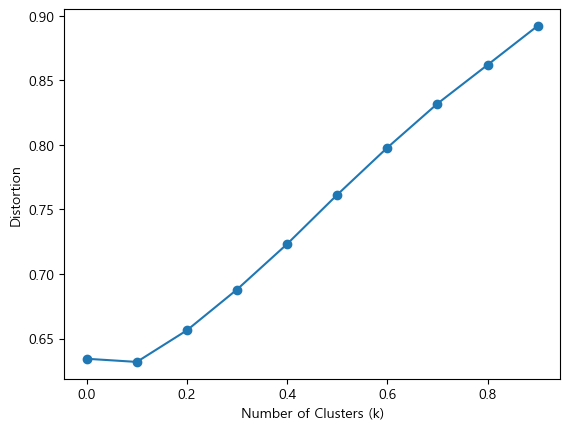

In [41]:
# 조건 탐색에 사용될 alpha 파라미터의 값들을 정의
alphas = np.arange(0, 1, 0.1)

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
rmse_result = list()

for alpha in alphas :
    model = ElasticNet(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    rmse_result.append(avg_rmse)
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.5f} '.format(alpha,avg_rmse))
    
# alpha 에 따른 rmse의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot( alphas, rmse_result, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

alpha 0.0 일 때 5 folds 의 평균 RMSE : 0.63438 
alpha 0.002 일 때 5 folds 의 평균 RMSE : 0.62866 
alpha 0.004 일 때 5 folds 의 평균 RMSE : 0.62355 
alpha 0.006 일 때 5 folds 의 평균 RMSE : 0.62062 
alpha 0.008 일 때 5 folds 의 평균 RMSE : 0.61849 
alpha 0.01 일 때 5 folds 의 평균 RMSE : 0.61699 
alpha 0.012 일 때 5 folds 의 평균 RMSE : 0.61578 
alpha 0.014 일 때 5 folds 의 평균 RMSE : 0.61480 
alpha 0.016 일 때 5 folds 의 평균 RMSE : 0.61406 
alpha 0.018000000000000002 일 때 5 folds 의 평균 RMSE : 0.61333 
alpha 0.02 일 때 5 folds 의 평균 RMSE : 0.61258 
alpha 0.022 일 때 5 folds 의 평균 RMSE : 0.61196 
alpha 0.024 일 때 5 folds 의 평균 RMSE : 0.61152 
alpha 0.026000000000000002 일 때 5 folds 의 평균 RMSE : 0.61112 
alpha 0.028 일 때 5 folds 의 평균 RMSE : 0.61096 
alpha 0.03 일 때 5 folds 의 평균 RMSE : 0.61080 
alpha 0.032 일 때 5 folds 의 평균 RMSE : 0.61069 
alpha 0.034 일 때 5 folds 의 평균 RMSE : 0.61074 
alpha 0.036000000000000004 일 때 5 folds 의 평균 RMSE : 0.61096 
alpha 0.038 일 때 5 folds 의 평균 RMSE : 0.61133 
alpha 0.04 일 때 5 folds 의 평균 RMSE : 0.61183 
alpha 0.042 일 때 

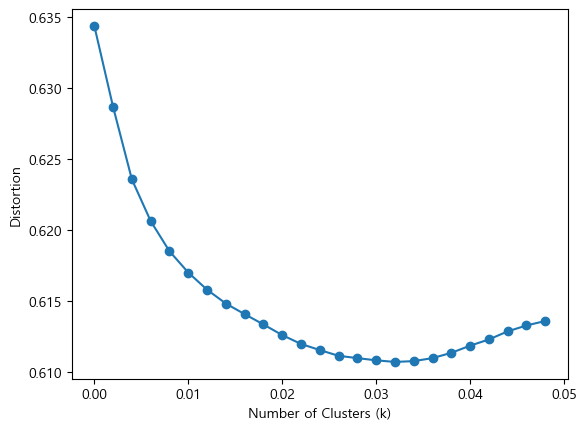

In [42]:
# 조건 탐색에 사용될 alpha 파라미터의 값들을 정의
alphas = np.arange(0, 0.05, 0.002)

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
rmse_result = list()

for alpha in alphas :
    model = ElasticNet(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    rmse_result.append(avg_rmse)
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.5f} '.format(alpha,avg_rmse))
    
# alpha 에 따른 rmse의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot( alphas, rmse_result, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

## 최소 RMSE 조건으로 회귀분석 수행

In [43]:
x = df_house.iloc[:, 1:14]
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = ElasticNet(alpha = 0.03)
fit_model = model.fit(x,y)

In [44]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()

# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

     features         coeff
0   intercept -6.785220e-16
1        CRIM -5.526109e-02
2          ZN  5.806313e-02
3       INDUS -1.070985e-02
4        CHAS  7.104723e-02
5         NOX -1.397638e-01
6          RM  3.152578e-01
7         AGE -0.000000e+00
8         DIS -2.205396e-01
9         RAD  5.820945e-02
10        TAX -3.504554e-02
11    PTRATIO -1.996359e-01
12          B  7.913407e-02
13      LSTAT -3.965134e-01

 5 folds 의 개별 Negative MSE scores:  [-0.123 -0.275 -0.402 -0.956 -0.321]
 5 folds 의 개별 RMSE scores :  [0.351 0.524 0.634 0.978 0.567]
 5 folds 의 평균 RMSE : 0.611 



In [45]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

R-squared : 0.7287
Adj. R-squared : 0.7215

F-statistic : 101.6485
p-value (of F-stat.) 0.0

      Feature  Coefficients  Standard Errors  t-statistic  Probabilities
0   Intercept       -0.0000            0.023       -0.000          1.000
1        CRIM       -0.0553            0.031       -1.758          0.079
2          ZN        0.0581            0.036        1.631          0.104
3       INDUS       -0.0107            0.047       -0.228          0.820
4        CHAS        0.0710            0.024        2.919          0.004
5         NOX       -0.1398            0.049       -2.839          0.005
6          RM        0.3153            0.033        9.654          0.000
7         AGE       -0.0000            0.041       -0.000          1.000
8         DIS       -0.2205            0.047       -4.722          0.000
9         RAD        0.0582            0.064        0.906          0.365
10        TAX       -0.0350            0.070       -0.497          0.619
11    PTRATIO       -0.1996    

## t-통계량의 p값을 참고하여 유의하지 않은 변수 삭제하여 재진행

In [46]:
x = df_house.iloc[:, 1:14].drop(['CRIM', 'ZN', 'INDUS', 'AGE', 'RAD', 'TAX'], axis =1)
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = ElasticNet(alpha = 0.03)
fit_model = model.fit(x,y)

In [47]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()

# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

    features         coeff
0  intercept -6.778358e-16
1       CHAS  7.306773e-02
2        NOX -1.433873e-01
3         RM  3.266294e-01
4        DIS -1.778136e-01
5    PTRATIO -2.122609e-01
6          B  8.284437e-02
7      LSTAT -4.060682e-01

 5 folds 의 개별 Negative MSE scores:  [-0.125 -0.281 -0.408 -0.896 -0.299]
 5 folds 의 개별 RMSE scores :  [0.354 0.53  0.638 0.946 0.547]
 5 folds 의 평균 RMSE : 0.603 



In [48]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

R-squared : 0.7188
Adj. R-squared : 0.7148

F-statistic : 181.8216
p-value (of F-stat.) 0.0

     Feature  Coefficients  Standard Errors  t-statistic  Probabilities
0  Intercept       -0.0000            0.024       -0.000          1.000
1       CHAS        0.0731            0.024        3.002          0.003
2        NOX       -0.1434            0.041       -3.479          0.001
3         RM        0.3266            0.031       10.451          0.000
4        DIS       -0.1778            0.038       -4.675          0.000
5    PTRATIO       -0.2123            0.027       -8.009          0.000
6          B        0.0828            0.026        3.126          0.002
7      LSTAT       -0.4061            0.037      -10.842          0.000



### 다중공선성 확인

In [49]:
# VIF 확인
VIF = pd.DataFrame()

VIF['features'] = newX.columns
VIF['VIF factor'] = [ variance_inflation_factor(newX.values, i) for i in range(newX.shape[1]) ]

VIF.round(3)

,features,VIF factor
0,Intercept,1.000
1,CHAS,1.049
2,NOX,3.009
3,RM,1.730
4,DIS,2.562
5,PTRATIO,1.244
6,B,1.243
7,LSTAT,2.484
